In [42]:
# Importing Dependencies
# Data Engineering
import pandas as pd

# Data Cleaning
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
data = pd.read_csv("Resources/data/West_Coast_activities_facilities_reservations.csv")
data = data.rename(columns={"FacilityID":"facilityid"})
data.head()

,facilityid,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName,NumberofReservations,PostalCode,AddressStateCode
0,10004152,128,2991.0,Camp 4,-119.603357,37.741426,37,NaN,3826,CA,95389
1,10004932,128,2845.0,Gorge Lake Campground,-121.151532,48.715713,8,"BOATING,FISHING,WATER ACCESS,KAYAKING,CANOEING",905,WA,98284
2,10039887,131,1077.0,Dark Day Campground,-121.108633,39.431283,10,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,BIKIN...",591,CA,95922
3,10039993,131,1077.0,Garden Point Boat-in Campground,-121.124367,39.433317,16,"BOATING,CAMPING,FISHING,WATER ACCESS,WATER SPO...",572,CA,95922
4,10040012,131,1077.0,Hornswoggle Group Campground,-121.120117,39.414933,6,"BOATING,CAMPING,FISHING,BIKING,HIKING,PICNICKI...",155,CA,95922


In [44]:
len(data.index)

892

In [49]:
Activities = data["ActivityName"].str.get_dummies(sep=',')
Activities

,ALL TERRAIN/OHV,DIFFICULT HIKING,HORSE,ACCESSIBLE SWIMMING,AMPHITHEATER,AUTO TOURING,BACKPACKING,BEACH CAMPING,BEACHCOMBING,BERRY PICKING,...,WATER ACTIVITIES,WATER SKIING,WATER SPORTS,WHALE WATCHING,WHITEWATER RAFTING,WILD HORSE VIEWING,WILDERNESS,WILDLIFE VIEWING,WINTER SPORTS,WOOD CUTTING
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
Activity_Ranking= Activities.sum()
Activity_Ranking

 ALL TERRAIN/OHV         1
 DIFFICULT HIKING        1
 HORSE                   1
ACCESSIBLE SWIMMING      2
AMPHITHEATER            13
                      ... 
WILD HORSE VIEWING       2
WILDERNESS              16
WILDLIFE VIEWING       290
WINTER SPORTS           23
WOOD CUTTING             1
Length: 102, dtype: int64

In [7]:
Activity_Ranking = pd.DataFrame(Activity_Ranking)
Activities_Ranking = Activity_Ranking.reset_index().sort_values([0], ascending=False)
Activities_Ranking.head(20)

,index,0
15,CAMPING,788
34,HIKING,612
29,FISHING,595
14,BOATING,345
10,BIKING,302
99,WILDLIFE VIEWING,290
87,SWIMMING SITE,206
94,WATER SPORTS,142
42,HUNTING,120
21,DAY USE AREA,118


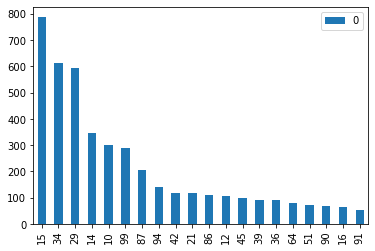

In [8]:
Activities_Ranking.head(20).plot(kind="bar")


In [9]:
full_activities_data = pd.concat([data,Activities], axis=1)
full_activities_data = full_activities_data.rename(columns={"FacilityID":"facilityid"})
full_activities_data.head()

,facilityid,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName,NumberofReservations,PostalCode,...,WATER ACTIVITIES,WATER SKIING,WATER SPORTS,WHALE WATCHING,WHITEWATER RAFTING,WILD HORSE VIEWING,WILDERNESS,WILDLIFE VIEWING,WINTER SPORTS,WOOD CUTTING
0,10004152,128,2991.0,Camp 4,-119.603357,37.741426,37,NaN,3826,CA,...,0,0,0,0,0,0,0,0,0,0
1,10004932,128,2845.0,Gorge Lake Campground,-121.151532,48.715713,8,"BOATING,FISHING,WATER ACCESS,KAYAKING,CANOEING",905,WA,...,0,0,0,0,0,0,0,0,0,0
2,10039887,131,1077.0,Dark Day Campground,-121.108633,39.431283,10,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,BIKIN...",591,CA,...,1,1,1,0,0,0,0,1,0,0
3,10039993,131,1077.0,Garden Point Boat-in Campground,-121.124367,39.433317,16,"BOATING,CAMPING,FISHING,WATER ACCESS,WATER SPO...",572,CA,...,1,1,1,0,0,0,0,0,0,0
4,10040012,131,1077.0,Hornswoggle Group Campground,-121.120117,39.414933,6,"BOATING,CAMPING,FISHING,BIKING,HIKING,PICNICKI...",155,CA,...,1,1,1,0,0,0,0,0,0,0


In [50]:
full_activities_data.to_csv("Resources/data/full_activities_data.csv", index = False, header=True)

In [10]:
westcoastreservations = pd.read_csv("Resources/data/reservations_West_Coast_SD_2017.csv")
westcoastreservations.head()

C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,agency,regiondescription,parentlocation,park,sitetype,facilityid,facilityzip,facilitystate,customerzip,customerstate,customercountry,startdate,enddate,orderdate,numberofpeople,reservation(days),daystay,totalbeforetax
0,NPS,Joshua Tree National Park,Pacific West Region,SHEEP PASS GROUP,GROUP TENT ONLY AREA NONELECTRIC,232470.0,92277-3597,CA,m6j2v8,ON,CAN,5/1/2017,5/4/2017,10/8/2016,10.0,205.0,3.0,60.0
1,USFS,MONTEREY RD - FS,LOS PADRES NF -FS,PLASKETT CREEK CAMPGROUND,STANDARD NONELECTRIC,231959.0,NaN,CA,92688,CA,USA,5/1/2017,5/14/2017,11/1/2016,6.0,181.0,13.0,19.0
2,NPS,Pinnacles National Park,Pacific West Region,PINNACLES CAMPGROUND,STANDARD NONELECTRIC,234015.0,NaN,CA,94534,CA,USA,5/1/2017,5/4/2017,11/1/2016,2.0,181.0,3.0,69.0
3,USFS,SIERRAVILLE RD - FS,TAHOE NF - FS,CALPINE LOOKOUT,CABIN NONELECTRIC,234131.0,NaN,CA,94114,CA,USA,5/1/2017,5/2/2017,11/1/2016,2.0,181.0,1.0,19.0
4,NPS,Sequoia and Kings Canyon National Park,Pacific West Region,POTWISHA CAMPGROUND,STANDARD NONELECTRIC,249979.0,NaN,CA,2441HB,UNKN,NLD,5/1/2017,5/2/2017,11/1/2016,4.0,181.0,1.0,10.0


In [11]:
len(westcoastreservations)

1048575

In [12]:
site_type_demand = westcoastreservations.groupby("facilityid").mean()
site_type_demand

,numberofpeople,reservation(days),daystay,totalbeforetax
facilityid,,,,
231947.0,35.445652,91.847826,1.782609,140.706522
231949.0,38.481481,125.962963,1.962963,133.333333
231950.0,24.693333,134.680000,2.133333,108.120000
231951.0,48.854167,143.604167,2.208333,198.479167
231952.0,44.800000,147.500000,2.500000,228.300000
...,...,...,...,...
267554.0,2.000000,9.000000,8.000000,20.000000
267555.0,3.076923,7.769231,2.538462,25.153846
267556.0,2.000000,8.000000,3.000000,20.000000


In [13]:
westcoastreservations.describe()

,facilityid,numberofpeople,reservation(days),daystay,totalbeforetax
count,1.047059e+06,539203.000000,539203.000000,539203.000000,539203.000000
mean,2.345011e+05,4.594502,76.644492,2.493812,52.676942
std,5.263062e+03,4.637214,65.673470,1.684322,49.874057
min,2.319470e+05,0.000000,-74.000000,1.000000,0.000000
25%,2.324470e+05,2.000000,14.000000,1.000000,22.000000
50%,2.328150e+05,4.000000,57.000000,2.000000,42.000000
75%,2.337790e+05,6.000000,138.000000,3.000000,66.000000
max,2.675600e+05,200.000000,356.000000,24.000000,2459.000000


In [14]:
Site_Types = pd.DataFrame(westcoastreservations)["sitetype"].value_counts()
Site_Types = pd.DataFrame(Site_Types).reset_index()
Site_Types

,index,sitetype
0,STANDARD NONELECTRIC,741889
1,TENT ONLY NONELECTRIC,153308
2,STANDARD ELECTRIC,36109
3,RV NONELECTRIC,26381
4,WALK TO,19461
5,GROUP STANDARD NONELECTRIC,11767
6,HIKE TO,10545
7,GROUP TENT ONLY AREA NONELECTRIC,10086
8,CABIN NONELECTRIC,9590
9,RV ELECTRIC,7573


In [37]:
sitetype1 = westcoastreservations.groupby(["facilityid","sitetype"]).size()
sitetype1

facilityid  sitetype                        
231947.0    GROUP TENT ONLY AREA NONELECTRIC    187
231949.0    GROUP TENT ONLY AREA NONELECTRIC     58
231950.0    GROUP STANDARD NONELECTRIC           22
            GROUP TENT ONLY AREA NONELECTRIC    128
231951.0    GROUP TENT ONLY AREA NONELECTRIC    103
                                               ... 
267554.0    EQUESTRIAN NONELECTRIC                2
267555.0    STANDARD NONELECTRIC                 13
267556.0    STANDARD NONELECTRIC                  1
267558.0    STANDARD NONELECTRIC                  5
267560.0    STANDARD NONELECTRIC                 10
Length: 1281, dtype: int64

In [16]:
site_type_count1 = pd.DataFrame(sitetype1).rename(columns={"facilityid":"fidcounts"}).sort_values('facilityid').reset_index()
site_type_count1.head()

,sitetype,facilityid,fidcounts
0,GROUP TENT ONLY AREA NONELECTRIC,231947.0,187
1,GROUP TENT ONLY AREA NONELECTRIC,231949.0,58
2,GROUP TENT ONLY AREA NONELECTRIC,231950.0,128
3,GROUP STANDARD NONELECTRIC,231950.0,22
4,GROUP TENT ONLY AREA NONELECTRIC,231951.0,103


In [17]:
site_type_count3 = site_type_count1["facilityid"]
site_type_count3 = pd.DataFrame(site_type_count3).reset_index()
site_type_count3

,index,facilityid
0,0,231947.0
1,1,231949.0
2,2,231950.0
3,3,231950.0
4,4,231951.0
...,...,...
1276,1276,267554.0
1277,1277,267555.0
1278,1278,267556.0
1279,1279,267558.0


In [18]:
site_type_count2 = site_type_count1.pivot(columns="sitetype", values="fidcounts").fillna(0).reset_index()
site_type_count2

sitetype,index,BOAT IN,CABIN ELECTRIC,CABIN NONELECTRIC,EQUESTRIAN NONELECTRIC,GROUP EQUESTRIAN,GROUP HIKE TO,GROUP PICNIC AREA,GROUP RV AREA NONELECTRIC,GROUP SHELTER ELECTRIC,...,MANAGEMENT,RV ELECTRIC,RV NONELECTRIC,SHELTER NONELECTRIC,STANDARD ELECTRIC,STANDARD NONELECTRIC,TENT ONLY ELECTRIC,TENT ONLY NONELECTRIC,WALK TO,YURT
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,1276,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
1278,1278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1279,1279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


In [19]:
site_facility = pd.merge(site_type_count3, site_type_count2, how='outer', on='index')
site_facility

,index,facilityid,BOAT IN,CABIN ELECTRIC,CABIN NONELECTRIC,EQUESTRIAN NONELECTRIC,GROUP EQUESTRIAN,GROUP HIKE TO,GROUP PICNIC AREA,GROUP RV AREA NONELECTRIC,...,MANAGEMENT,RV ELECTRIC,RV NONELECTRIC,SHELTER NONELECTRIC,STANDARD ELECTRIC,STANDARD NONELECTRIC,TENT ONLY ELECTRIC,TENT ONLY NONELECTRIC,WALK TO,YURT
0,0,231947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,231949.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,231950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,231950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,231951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,1276,267554.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,1277,267555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
1278,1278,267556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1279,1279,267558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


In [20]:
site_facility['facilityid'].value_counts()

233414.0    7
233384.0    5
234074.0    5
232070.0    5
234072.0    5
           ..
232187.0    1
232871.0    1
232184.0    1
232761.0    1
233740.0    1
Name: facilityid, Length: 866, dtype: int64

In [21]:
site_facility = site_facility.groupby("facilityid").agg(sum)
site_facility["tenting"]=site_facility["STANDARD NONELECTRIC"]+site_facility["TENT ONLY NONELECTRIC"]+site_facility["EQUESTRIAN NONELECTRIC"]+site_facility["TENT ONLY ELECTRIC"]
site_facility["group"]=site_facility["GROUP STANDARD AREA ELECTRIC"]+site_facility["GROUP STANDARD NONELECTRIC"]+site_facility["GROUP TENT ONLY AREA NONELECTRIC"]+site_facility["GROUP STANDARD AREA NONELECTRIC"]+site_facility["GROUP HIKE TO"]+site_facility["GROUP WALK TO"]+site_facility["GROUP STANDARD ELECTRIC"]+site_facility["GROUP EQUESTRIAN"]+site_facility["GROUP SHELTER NONELECTRIC"]+site_facility["GROUP RV AREA NONELECTRIC"]+site_facility["GROUP PICNIC AREA"]+site_facility["GROUP SHELTER ELECTRIC"]
site_facility["remote"]=site_facility["WALK TO"]+site_facility["HIKE TO"]+site_facility["BOAT IN"]+site_facility["LOOKOUT"]
site_facility["structured_RV"]=site_facility["STANDARD ELECTRIC"]+site_facility["RV NONELECTRIC"]+site_facility["CABIN NONELECTRIC"]+site_facility["RV ELECTRIC"]+site_facility["CABIN ELECTRIC"]+site_facility["YURT"]+site_facility["SHELTER NONELECTRIC"]+site_facility["MANAGEMENT"]
site_facility

,index,BOAT IN,CABIN ELECTRIC,CABIN NONELECTRIC,EQUESTRIAN NONELECTRIC,GROUP EQUESTRIAN,GROUP HIKE TO,GROUP PICNIC AREA,GROUP RV AREA NONELECTRIC,GROUP SHELTER ELECTRIC,...,STANDARD ELECTRIC,STANDARD NONELECTRIC,TENT ONLY ELECTRIC,TENT ONLY NONELECTRIC,WALK TO,YURT,tenting,group,remote,structured_RV
facilityid,,,,,,,,,,,,,,,,,,,,,
231947.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,0.0,0.0
231949.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0
231950.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0
231951.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,0.0
231952.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267554.0,1276,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
267555.0,1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
267556.0,1278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
site_type_complete = pd.merge(site_facility, site_type_demand, how='outer', on='facilityid').reset_index()
site_type_complete

,facilityid,index,BOAT IN,CABIN ELECTRIC,CABIN NONELECTRIC,EQUESTRIAN NONELECTRIC,GROUP EQUESTRIAN,GROUP HIKE TO,GROUP PICNIC AREA,GROUP RV AREA NONELECTRIC,...,WALK TO,YURT,tenting,group,remote,structured_RV,numberofpeople,reservation(days),daystay,totalbeforetax
0,231947.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,187.0,0.0,0.0,35.445652,91.847826,1.782609,140.706522
1,231949.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.0,0.0,0.0,38.481481,125.962963,1.962963,133.333333
2,231950.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,150.0,0.0,0.0,24.693333,134.680000,2.133333,108.120000
3,231951.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,103.0,0.0,0.0,48.854167,143.604167,2.208333,198.479167
4,231952.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,14.0,0.0,0.0,44.800000,147.500000,2.500000,228.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,267554.0,1276,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.000000,9.000000,8.000000,20.000000
862,267555.0,1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,0.0,0.0,3.076923,7.769231,2.538462,25.153846
863,267556.0,1278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.000000,8.000000,3.000000,20.000000
864,267558.0,1279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,2.800000,8.400000,2.600000,36.000000


In [23]:
site_type_complete1 = site_type_complete[["facilityid","tenting", "group", "remote", "structured_RV", "numberofpeople", "reservation(days)" ,"daystay", "totalbeforetax"]]
site_type_complete1

,facilityid,tenting,group,remote,structured_RV,numberofpeople,reservation(days),daystay,totalbeforetax
0,231947.0,0.0,187.0,0.0,0.0,35.445652,91.847826,1.782609,140.706522
1,231949.0,0.0,58.0,0.0,0.0,38.481481,125.962963,1.962963,133.333333
2,231950.0,0.0,150.0,0.0,0.0,24.693333,134.680000,2.133333,108.120000
3,231951.0,0.0,103.0,0.0,0.0,48.854167,143.604167,2.208333,198.479167
4,231952.0,0.0,14.0,0.0,0.0,44.800000,147.500000,2.500000,228.300000
...,...,...,...,...,...,...,...,...,...
861,267554.0,2.0,0.0,0.0,0.0,2.000000,9.000000,8.000000,20.000000
862,267555.0,13.0,0.0,0.0,0.0,3.076923,7.769231,2.538462,25.153846
863,267556.0,1.0,0.0,0.0,0.0,2.000000,8.000000,3.000000,20.000000
864,267558.0,5.0,0.0,0.0,0.0,2.800000,8.400000,2.600000,36.000000


In [24]:
site_type_complete_final= pd.merge(site_type_complete1, full_activities_data, how='inner', on='facilityid')
site_type_complete_final

,facilityid,tenting,group,remote,structured_RV,numberofpeople,reservation(days),daystay,totalbeforetax,OrgFacilityID,...,WATER ACTIVITIES,WATER SKIING,WATER SPORTS,WHALE WATCHING,WHITEWATER RAFTING,WILD HORSE VIEWING,WILDERNESS,WILDLIFE VIEWING,WINTER SPORTS,WOOD CUTTING
0,231947.0,0.0,187.0,0.0,0.0,35.445652,91.847826,1.782609,140.706522,131,...,0,0,0,0,0,0,1,1,0,0
1,231949.0,0.0,58.0,0.0,0.0,38.481481,125.962963,1.962963,133.333333,131,...,0,0,0,0,0,0,0,0,0,0
2,231950.0,0.0,150.0,0.0,0.0,24.693333,134.680000,2.133333,108.120000,131,...,0,0,0,0,0,0,0,1,0,0
3,231951.0,0.0,103.0,0.0,0.0,48.854167,143.604167,2.208333,198.479167,131,...,0,0,0,0,0,0,0,1,0,0
4,231952.0,0.0,14.0,0.0,0.0,44.800000,147.500000,2.500000,228.300000,131,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,267554.0,2.0,0.0,0.0,0.0,2.000000,9.000000,8.000000,20.000000,131,...,0,0,0,0,0,0,0,0,0,0
820,267555.0,13.0,0.0,0.0,0.0,3.076923,7.769231,2.538462,25.153846,131,...,0,0,0,0,0,0,0,0,0,0
821,267556.0,1.0,0.0,0.0,0.0,2.000000,8.000000,3.000000,20.000000,131,...,0,0,0,0,0,0,0,0,0,0
822,267558.0,5.0,0.0,0.0,0.0,2.800000,8.400000,2.600000,36.000000,131,...,0,0,0,0,0,0,0,0,0,0


In [25]:
site_type_complete_analyse = site_type_complete_final[["tenting", "group", "remote", "structured_RV", "NumberofCampsites", "NumberofReservations"]]
site_type_complete_analyse["tenting_demand"] = site_type_complete_analyse["NumberofReservations"]/ site_type_complete_analyse["tenting"]
site_type_complete_analyse["group_demand"] = site_type_complete_analyse["NumberofReservations"]/ site_type_complete_analyse["group"]
site_type_complete_analyse["remote_demand"] = site_type_complete_analyse["NumberofReservations"]/ site_type_complete_analyse["remote"]
site_type_complete_analyse["structured_RV_demand"] = site_type_complete_analyse["NumberofReservations"]/ site_type_complete_analyse["structured_RV"]
site_type_complete_analyse

C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,tenting,group,remote,structured_RV,NumberofCampsites,NumberofReservations,tenting_demand,group_demand,remote_demand,structured_RV_demand
0,0.0,187.0,0.0,0.0,3,465,inf,2.486631,inf,inf
1,0.0,58.0,0.0,0.0,1,58,inf,1.000000,inf,inf
2,0.0,150.0,0.0,0.0,5,555,inf,3.700000,inf,inf
3,0.0,103.0,0.0,0.0,3,274,inf,2.660194,inf,inf
4,0.0,14.0,0.0,0.0,1,62,inf,4.428571,inf,inf
...,...,...,...,...,...,...,...,...,...,...
819,2.0,0.0,0.0,0.0,9,190,95.000000,inf,inf,inf
820,13.0,0.0,0.0,0.0,22,2057,158.230769,inf,inf,inf
821,1.0,0.0,0.0,0.0,11,1120,1120.000000,inf,inf,inf
822,5.0,0.0,0.0,0.0,14,505,101.000000,inf,inf,inf


C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1156: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)
C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


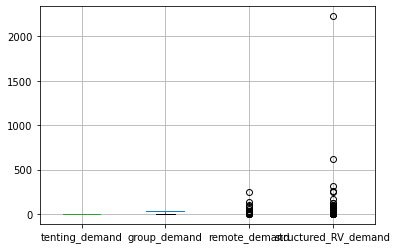

In [26]:
boxplot= site_type_complete_analyse.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])
boxplot

In [207]:
site_type_complete_analyse = site_type_complete_final[["facilityid","tenting", "group", "remote", "structured_RV", "numberofpeople", "reservation(days)" ,"daystay", "totalbeforetax", "NumberofCampsites"]]
site_type_complete_analyse["tenting_demand1"] = site_type_complete_analyse["reservation(days)"]/ site_type_complete_analyse["tenting"]
site_type_complete_analyse["group_demand1"] = site_type_complete_analyse["reservation(days)"]/ site_type_complete_analyse["group"]
site_type_complete_analyse["remote_demand1"] = site_type_complete_analyse["reservation(days)"]/ site_type_complete_analyse["remote"]
site_type_complete_analyse["structured_RV_demand1"] = site_type_complete_analyse["reservation(days)"]/ site_type_complete_analyse["structured_RV"]
site_type_complete_analyse

C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,facilityid,tenting,group,remote,structured_RV,numberofpeople,reservation(days),daystay,totalbeforetax,NumberofCampsites,tenting_demand1,group_demand1,remote_demand1,structured_RV_demand1
0,231947.0,0.0,187.0,0.0,0.0,35.445652,91.847826,1.782609,140.706522,3,inf,0.491165,inf,inf
1,231949.0,0.0,58.0,0.0,0.0,38.481481,125.962963,1.962963,133.333333,1,inf,2.171775,inf,inf
2,231950.0,0.0,150.0,0.0,0.0,24.693333,134.680000,2.133333,108.120000,5,inf,0.897867,inf,inf
3,231951.0,0.0,103.0,0.0,0.0,48.854167,143.604167,2.208333,198.479167,3,inf,1.394215,inf,inf
4,231952.0,0.0,14.0,0.0,0.0,44.800000,147.500000,2.500000,228.300000,1,inf,10.535714,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,267554.0,2.0,0.0,0.0,0.0,2.000000,9.000000,8.000000,20.000000,9,4.500000,inf,inf,inf
820,267555.0,13.0,0.0,0.0,0.0,3.076923,7.769231,2.538462,25.153846,22,0.597633,inf,inf,inf
821,267556.0,1.0,0.0,0.0,0.0,2.000000,8.000000,3.000000,20.000000,11,8.000000,inf,inf,inf
822,267558.0,5.0,0.0,0.0,0.0,2.800000,8.400000,2.600000,36.000000,14,1.680000,inf,inf,inf


In [31]:
site_type_complete_analyse.to_csv("Resources/data/site_type_complete_analyse.csv", index = False, header=True)